# Loan Prediction
## Author: Eren ERİŞ

It is a machine learning model that we have prepared to support the decision of whether or not to give a loan to the person applying for a loan. Here, an attempt was made to make a prediction through classification and a model comparison was made.

In [133]:
#İmport Liblary
import pandas as pd
from sklearn.model_selection import train_test_split;
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [134]:
#Load Dataset
df = pd.read_csv("LoansTrainingSet.csv")

C:\Users\EREN\AppData\Local\Temp\ipykernel_18536\776787027.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LoansTrainingSet.csv")


### EDA Analysis

In [135]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [136]:
df.shape

(256984, 19)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [138]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [139]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

### Filling empty data

In [140]:
#If data colum values more %70 is empty. This colum can delete we
df = df.drop(['Months since last delinquent'],axis=1)

In [141]:
#Years in current job Coluns Convert Decimal
df["Years in current job"]=df["Years in current job"].str.extract('(\d+)').astype(float)

In [142]:
df['Years in current job'] = df['Years in current job'].fillna(0) 

In [143]:
#
df['Annual Income'] = df['Annual Income'].fillna(0) 

In [144]:
df['Credit Score'] = df['Credit Score'].fillna(df.groupby("Monthly Debt")["Credit Score"].transform("median")) 

In [145]:
df['Credit Score'] = df['Credit Score'].map(lambda x: x/10 if x>800 else x)

In [146]:
df["Monthly Debt"]=df["Monthly Debt"].str.extract('(\d+)').astype(float)

In [147]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(0) 

In [148]:
df['Tax Liens'] = df['Tax Liens'].fillna(0) 

In [149]:
df['Credit Score'] = df['Credit Score'].fillna(800) 

In [151]:
df["Maximum Open Credit"] = pd.to_numeric(df["Maximum Open Credit"], errors='coerce')
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df["Maximum Open Credit"].median()) 

In [152]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10.0,Home Mortgage,33694.0,Debt Consolidation,584.0,12.3,10,0,6760,16056.0,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4.0,Home Mortgage,42269.0,other,1.0,26.3,17,0,6262,19149.0,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10.0,Home Mortgage,90126.0,Debt Consolidation,1.0,28.8,5,0,20967,28335.0,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10.0,Own Home,38072.0,Debt Consolidation,751.0,26.2,9,0,22529,43915.0,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.0,11.5,12,0,17391,37081.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,3911,Short Term,717.0,2.0,Rent,0.0,Debt Consolidation,1.0,19.9,16,0,43992,44080.0,0.0,0.0
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,5078,Short Term,737.0,10.0,Own Home,77186.0,Debt Consolidation,1.0,19.1,9,0,1717,9758.0,0.0,0.0
256981,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9.0,Home Mortgage,52504.0,Debt Consolidation,297.0,15.1,8,0,3315,20090.0,0.0,0.0
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,12116,Short Term,746.0,9.0,Home Mortgage,52504.0,Debt Consolidation,297.0,15.1,8,0,3315,20090.0,0.0,0.0


In [153]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [154]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.017007,0.008777,0.135144,-0.001271,0.014725,-0.003094,-0.000062,0.003138,0.006478,0.003577,-0.003067
Credit Score,0.017007,1.000000,-0.002029,-0.049565,-0.019790,0.052804,-0.006642,-0.029644,0.016617,0.007171,-0.023301,-0.012978
Years in current job,0.008777,-0.002029,1.000000,0.072007,-0.056554,0.151722,0.061244,0.018629,0.095675,0.004026,0.019087,0.002986
Annual Income,0.135144,-0.049565,0.072007,1.000000,-0.157334,0.109839,0.104177,-0.008785,0.208322,0.026501,-0.032209,0.029710
Monthly Debt,-0.001271,-0.019790,-0.056554,-0.157334,1.000000,-0.092361,-0.164520,0.033584,-0.192513,-0.012784,0.050319,-0.010554
Years of Credit History,0.014725,0.052804,0.151722,0.109839,-0.092361,1.000000,0.128033,0.061251,0.201001,0.021798,0.061737,0.020911
Number of Open Accounts,-0.003094,-0.006642,0.061244,0.104177,-0.164520,0.128033,1.000000,-0.013731,0.222763,0.019305,-0.022565,0.005754
Number of Credit Problems,-0.000062,-0.029644,0.018629,-0.008785,0.033584,0.061251,-0.013731,1.000000,-0.103814,-0.008329,0.755787,0.584912
Current Credit Balance,0.003138,0.016617,0.095675,0.208322,-0.192513,0.201001,0.222763,-0.103814,1.000000,0.111659,-0.117839,-0.011119
Maximum Open Credit,0.006478,0.007171,0.004026,0.026501,-0.012784,0.021798,0.019305,-0.008329,0.111659,1.000000,-0.009983,-0.000491


<Axes: >

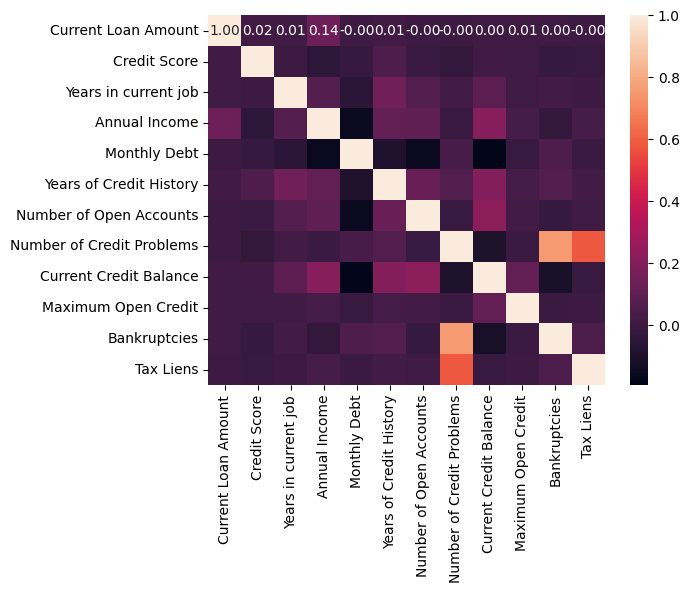

In [155]:
sns.heatmap(df.corr(numeric_only=True)
            ,annot=True,fmt='.2f')

In [156]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [157]:
x = df[['Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens']]
y=df['Loan Status']

In [158]:
x

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,11520,Short Term,741.0,10.0,33694.0,Debt Consolidation,584.0,12.3,10,0,6760,16056.0,0.0,0.0
1,3441,Short Term,734.0,4.0,42269.0,other,1.0,26.3,17,0,6262,19149.0,0.0,0.0
2,21029,Short Term,747.0,10.0,90126.0,Debt Consolidation,1.0,28.8,5,0,20967,28335.0,0.0,0.0
3,18743,Short Term,747.0,10.0,38072.0,Debt Consolidation,751.0,26.2,9,0,22529,43915.0,0.0,0.0
4,11731,Short Term,746.0,4.0,50025.0,Debt Consolidation,355.0,11.5,12,0,17391,37081.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256979,3911,Short Term,717.0,2.0,0.0,Debt Consolidation,1.0,19.9,16,0,43992,44080.0,0.0,0.0
256980,5078,Short Term,737.0,10.0,77186.0,Debt Consolidation,1.0,19.1,9,0,1717,9758.0,0.0,0.0
256981,12116,Short Term,746.0,9.0,52504.0,Debt Consolidation,297.0,15.1,8,0,3315,20090.0,0.0,0.0
256982,12116,Short Term,746.0,9.0,52504.0,Debt Consolidation,297.0,15.1,8,0,3315,20090.0,0.0,0.0


In [159]:
x=pd.get_dummies(x,drop_first=True)
y=pd.get_dummies(y,drop_first=True)

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [161]:
np = []

In [162]:
def getmodel (model , x_train, y_train , x_test , y_test):
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    #score.appened(f'Name model: {model}',accuracy_score(predict,y_test))
    print("--------Accuary Score--------")
    print(accuracy_score(predict,y_test))
    print("--------Classification Report--------")
    print(classification_report(predict,y_test))
    sns.heatmap(confusion_matrix(predict,y_test),annot=True,fmt='.2f')

In [163]:
x_train

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Term_Short Term,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
146869,99999999,751.0,10.0,51893.0,462.0,20.5,11,0,10894,50202.0,...,True,False,False,True,False,False,False,False,False,False
216995,15898,695.0,10.0,0.0,431.0,29.7,8,0,14092,29920.0,...,True,False,False,True,False,False,False,False,False,False
68092,10821,750.0,7.0,42277.0,325.0,25.3,9,0,9549,97435.0,...,True,False,False,True,False,False,False,False,False,False
51423,14972,800.0,8.0,0.0,1.0,11.6,18,0,7981,13573.0,...,False,False,False,True,False,False,False,False,False,False
84870,99999999,730.0,10.0,69117.0,708.0,20.9,13,0,16819,43571.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,10324,717.0,4.0,29853.0,263.0,16.0,5,0,4212,12139.0,...,False,False,False,True,False,False,False,False,False,False
103694,22005,747.0,3.0,111034.0,1.0,13.8,9,0,11647,55730.0,...,True,False,False,True,False,False,False,False,False,False
131932,4967,745.0,7.0,69531.0,741.0,15.4,5,0,12400,25411.0,...,True,False,False,False,False,False,False,False,False,True
146867,7927,800.0,5.0,0.0,724.0,7.7,6,0,5965,12199.0,...,True,False,False,True,False,False,False,False,False,False


D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------Accuary Score--------
0.44959822557736834
--------Classification Report--------
              precision    recall  f1-score   support

       False       1.00      0.36      0.53     44410
        True       0.20      1.00      0.33      6987

    accuracy                           0.45     51397
   macro avg       0.60      0.68      0.43     51397
weighted avg       0.89      0.45      0.51     51397



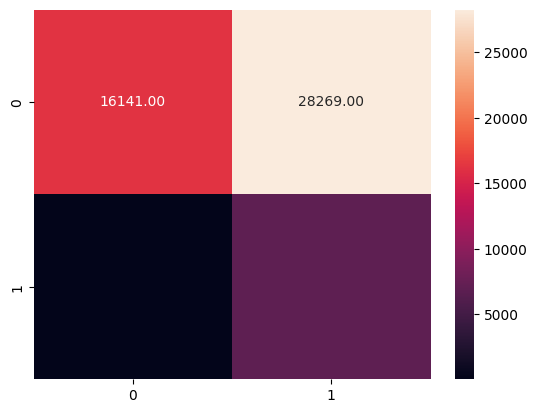

In [164]:
getmodel (GaussianNB() , x_train, y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------Accuary Score--------
0.6871801856139463
--------Classification Report--------
              precision    recall  f1-score   support

       False       0.04      0.54      0.07      1065
        True       0.99      0.69      0.81     50332

    accuracy                           0.69     51397
   macro avg       0.51      0.61      0.44     51397
weighted avg       0.97      0.69      0.80     51397



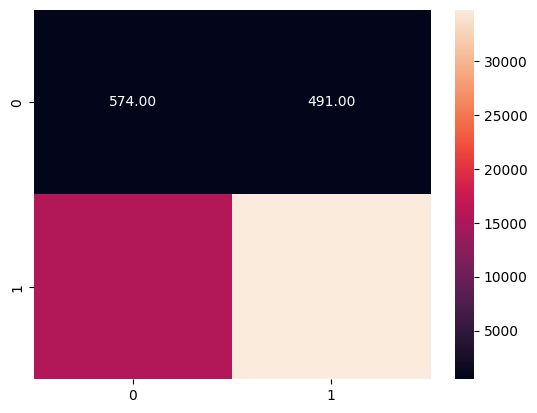

In [165]:
getmodel (BernoulliNB() , x_train, y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


--------Accuary Score--------
0.6791252407728078
--------Classification Report--------
              precision    recall  f1-score   support

       False       0.42      0.49      0.45     13745
        True       0.80      0.75      0.77     37652

    accuracy                           0.68     51397
   macro avg       0.61      0.62      0.61     51397
weighted avg       0.70      0.68      0.69     51397



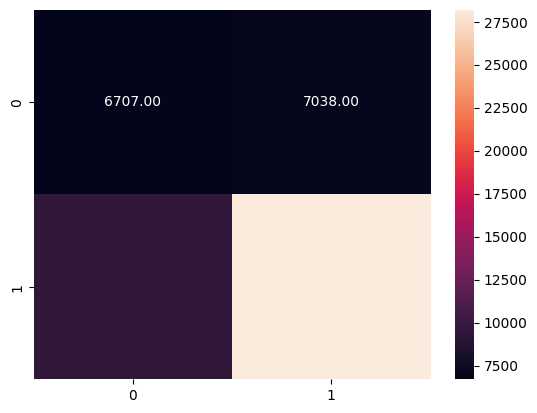

In [166]:
getmodel (KNeighborsClassifier() , x_train, y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------Accuary Score--------
0.6856042181450279
--------Classification Report--------
              precision    recall  f1-score   support

       False       0.00      1.00      0.00         2
        True       1.00      0.69      0.81     51395

    accuracy                           0.69     51397
   macro avg       0.50      0.84      0.41     51397
weighted avg       1.00      0.69      0.81     51397



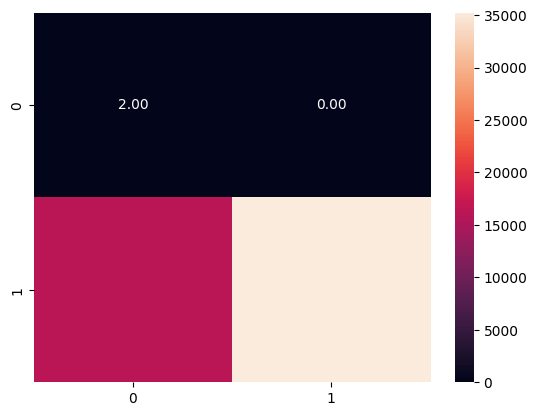

In [167]:
getmodel (LogisticRegression(), x_train, y_train , x_test , y_test)

--------Accuary Score--------
0.7647722629725471
--------Classification Report--------
              precision    recall  f1-score   support

       False       0.72      0.61      0.66     19209
        True       0.79      0.86      0.82     32188

    accuracy                           0.76     51397
   macro avg       0.75      0.73      0.74     51397
weighted avg       0.76      0.76      0.76     51397



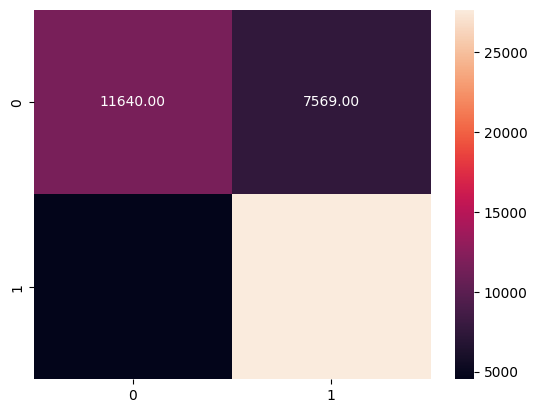

In [168]:
getmodel (DecisionTreeClassifier(), x_train, y_train , x_test , y_test)

D:\Users\EREN\anaconda3\envs\Tester\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


--------Accuary Score--------
0.8502830904527502
--------Classification Report--------
              precision    recall  f1-score   support

       False       0.70      0.80      0.75     14272
        True       0.92      0.87      0.89     37125

    accuracy                           0.85     51397
   macro avg       0.81      0.83      0.82     51397
weighted avg       0.86      0.85      0.85     51397



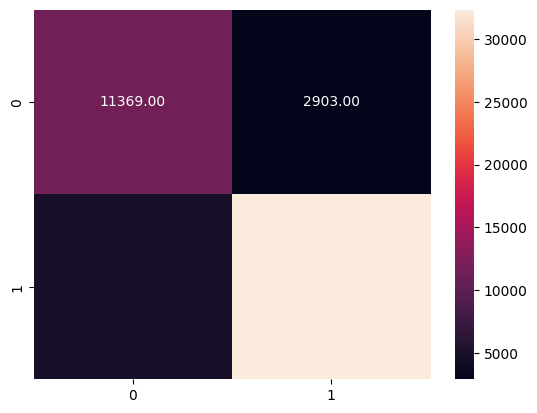

In [169]:
getmodel (RandomForestClassifier(), x_train, y_train , x_test , y_test)